# RNA Structure prediction maximizing expected accuracy and stacking

### Import Modules and test files

In [1]:
import sys
import os

# Récupérer le chemin absolu du dossier parent
parent_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))

# Ajouter ce chemin aux modules Python
sys.path.append(parent_dir)
print(parent_dir)

c:\Users\manon\OneDrive\Bureau\X\bioinf_MEA_stacking\MEA_stacking


In [2]:
from modules.nussinov import*
from modules.simple_MEA import *
from modules.MEA_stacking import *

In [3]:
from tests.importdata import *

Folder path: c:\Users\manon\OneDrive\Bureau\X\bioinf_MEA_stacking\MEA_stacking\data


In [4]:
rna_files = import_test_files()

✅ File 5S_rRNA.apsi-54.sci-95.no-1.ref.fa loaded with success (fasta)
✅ File Intron_gpII.apsi-54.sci-66.no-1.ref.fa loaded with success (fasta)
✅ File RF00100.stockholm.txt loaded with success (stockholm)
✅ File RF00568.stockholm.txt loaded with success (stockholm)
✅ File SRP_euk_arch.apsi-34.sci-67.no-1.ref.fa loaded with success (fasta)
✅ File SRP_euk_arch.apsi-68.sci-83.no-1.ref.fa loaded with success (fasta)
✅ File tRNA_15.stk loaded with success (stockholm)
✅ File tRNA_5.aln loaded with success (clustal)
✅ File tRNA_7-clustalw.aln loaded with success (clustal)
✅ File tRNA_7.stk loaded with success (stockholm)


### Choose file to test

In [26]:
test_list_of_sequences=rna_files["tRNA_7-clustalw.aln"]
print(test_list_of_sequences)

['GCGGGGGUGCCCGAGCCUGGCCAAAGGGGUCGGGCUCAGGACCCGAUGGCGUAGGCCUGCGUGGGUUCAAAUCCCACCCCCCGCA', 'GCAGUCGUGGCCGAG--UGGUUAA-GGCGUCUGACUCGAAAUCAGAUUCCCUCUGGGAGCGUAGGUUCGAAUCCUACCGGCUGCG', 'UGGAGUAUAGCCAAG--UGGUAAG--GCAUCGGUUUUUGGUACCG---------GCAUGCAAAGGUUCGAAUCCUUUUACUCCAG', 'CGGAAAGUAGCUUAGCUUGGUAGA--GCACUCGGUUUGGGACCGA---------GGGGUCGCAGGUUCGAAUCCUGUCUUUCCGA', 'GCCGGGGUGGGGUAG--UGGCCAU-CCUGGGGGACUGUGGAUCCC----------CUGACCCGGGUUCAAUUCCCGGUCCCGGCC', '-----GUAAACAUAGUUUAAUCAA-AACAUUAGAUUGUGAAUCUA----------ACAAUAGAGGCUCGAAACCUCUUGCUUACC', '-------------AGUAAAGUCAGCUAAAAAAGCUUUUGGGCCCAUACCCC---AAACAUGUUGGUUAAACCCCUUCCUUUACUA']


### Comparison

In [13]:
from tests.compare import *

Building consensus structure of : 
['GCAGUCGUGGCCGAGU---GGUUAAGGCGUCUGACUCGAAAUCAGAUUCCCUCUGGGAGCGUAGGUUCGAAUCCUACCGGCUGCG', 'GCGGGGGUGCCCGAGCCUGGCCAAAGGGGUCGGGCUCAGGACCCGAUGGCGUAGGCCUGCGUGGGUUCAAAUCCCACCCCCCGCA', 'UGGAGUAUAGCCAAG--UGG--UAAGGCAUCGGUUUUUGGUACCG---------GCAUGCAAAGGUUCGAAUCCUUUUACUCCAG', 'CGGAAAGUAGCUUAGCUUGG--UAGAGCACUCGGUUUGGGACCGA---------GGGGUCGCAGGUUCGAAUCCUGUCUUUCCGA', 'GCCGGGGUGGGGUAGUGGCCAUCCUGG---GGGACUGUGGAUCCC----------CUGACCCGGGUUCAAUUCCCGGUCCCGGCC', 'GUAAACAUAGUUUA------AUCAAAACAUUAGAUUGUGAAUCUAA----------CAAUAGAGGCUCGAAACCUCUUGCUUACC', 'AGUAAAGUCAGCUA------AAAAAGCUUUUGGGCCCAUACCCCAA----------ACAUGUUGGUUAAACCCCUUCCUUUACUA']
Using the MEA_stacking with parameter gamma =1, delta=2
...
['(((((((..(((.............)))((((((.......))))))((((...))))..(((((.......)))))))))))).', '(((((((..((.((((((((((.....)))))))))).)).......(((....)))...(((((.......)))))))))))).', '(((((((...(((....)))......((((((((.......))))...........))))(((((.......)))))))))))).', '((((((((((..

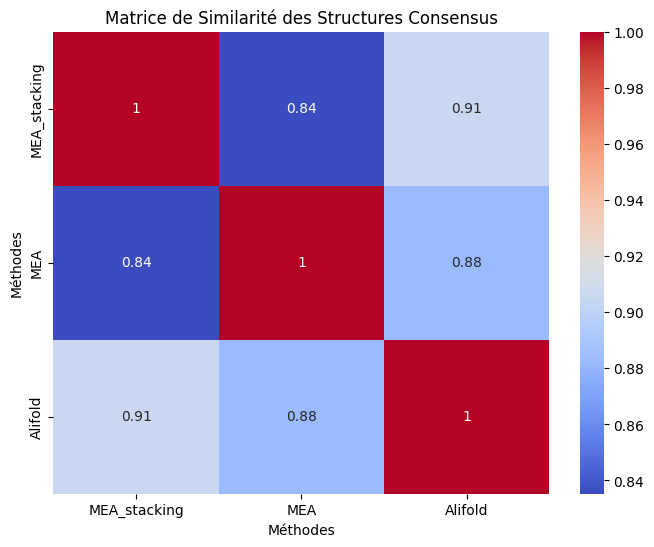

In [ ]:

structures, sim_matrix = similarity_matrix(test_list_of_sequences,levenshtein_distance,1,2,2)
plot_similarity_matrix(sim_matrix, method_names)

### Visualisation

In [15]:
import tempfile
from IPython.display import SVG

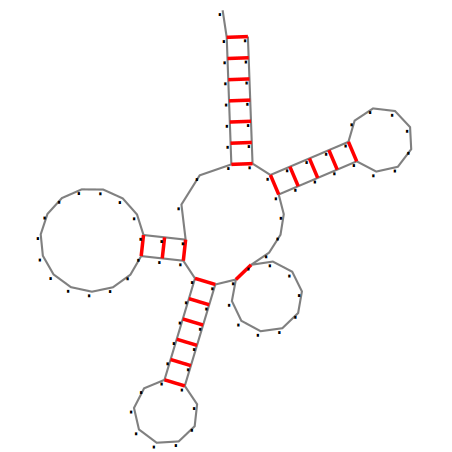

In [16]:
ss=structures[0]

sequence="".join(["." for i in range(len(ss))])

fp = tempfile.NamedTemporaryFile(suffix=".svg", delete=False)
RNA.svg_rna_plot(sequence, structure=ss, ssfile=fp.name)
SVG(fp.name)

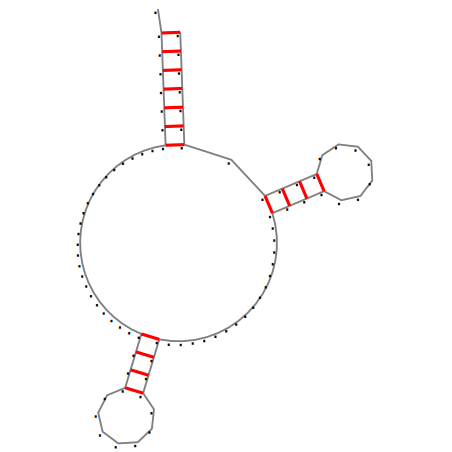

In [17]:
ss=structures[1]

sequence="".join(["." for i in range(len(ss))])

fp = tempfile.NamedTemporaryFile(suffix=".svg", delete=False)
RNA.svg_rna_plot(sequence, structure=ss, ssfile=fp.name)
SVG(fp.name)

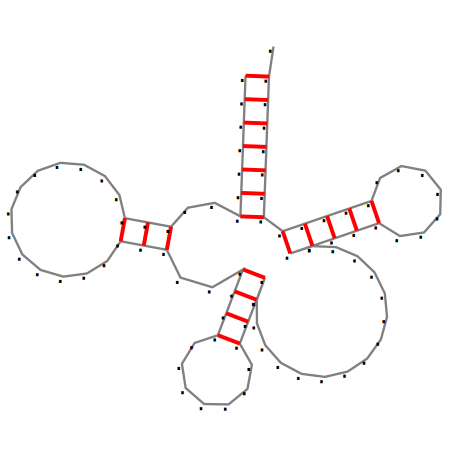

In [18]:
ss=structures[2]

sequence="".join(["." for i in range(len(ss))])

fp = tempfile.NamedTemporaryFile(suffix=".svg", delete=False)
RNA.svg_rna_plot(sequence, structure=ss, ssfile=fp.name)
SVG(fp.name)

### Test with different parameters

Building consensus structure of : 
['GCGGGGGUGCCCGAGCCUGGCCAAAGGGGUCGGGCUCAGGACCCGAUGGCGUAGGCCUGCGUGGGUUCAAAUCCCACCCCCCGCA', 'GCAGUCGUGGCCGAG--UGGUUAA-GGCGUCUGACUCGAAAUCAGAUUCCCUCUGGGAGCGUAGGUUCGAAUCCUACCGGCUGCG', 'UGGAGUAUAGCCAAG--UGGUAAG--GCAUCGGUUUUUGGUACCG---------GCAUGCAAAGGUUCGAAUCCUUUUACUCCAG', 'CGGAAAGUAGCUUAGCUUGGUAGA--GCACUCGGUUUGGGACCGA---------GGGGUCGCAGGUUCGAAUCCUGUCUUUCCGA', 'GCCGGGGUGGGGUAG--UGGCCAU-CCUGGGGGACUGUGGAUCCC----------CUGACCCGGGUUCAAUUCCCGGUCCCGGCC', '-----GUAAACAUAGUUUAAUCAA-AACAUUAGAUUGUGAAUCUA----------ACAAUAGAGGCUCGAAACCUCUUGCUUACC', '-------------AGUAAAGUCAGCUAAAAAAGCUUUUGGGCCCAUACCCC---AAACAUGUUGGUUAAACCCCUUCCUUUACUA']
Using RNA Alifold
GCGGGGGUGCCCGAGCCUGGCCAAAGGGGUCGGGCUCAGGACCCGAUGGCGUAGGCCUGCGUGGGUUCAAAUCCCACCCCCCGCA
GCAGUCGUGGCCGAG--UGGUUAA-GGCGUCUGACUCGAAAUCAGAUUCCCUCUGGGAGCGUAGGUUCGAAUCCUACCGGCUGCG
UGGAGUAUAGCCAAG--UGGUAAG--GCAUCGGUUUUUGGUACCG---------GCAUGCAAAGGUUCGAAUCCUUUUACUCCAG
CGGAAAGUAGCUUAGCUUGGUAGA--GCACUCGGUUUGGGACCGA---------GGGGUCGCAGG

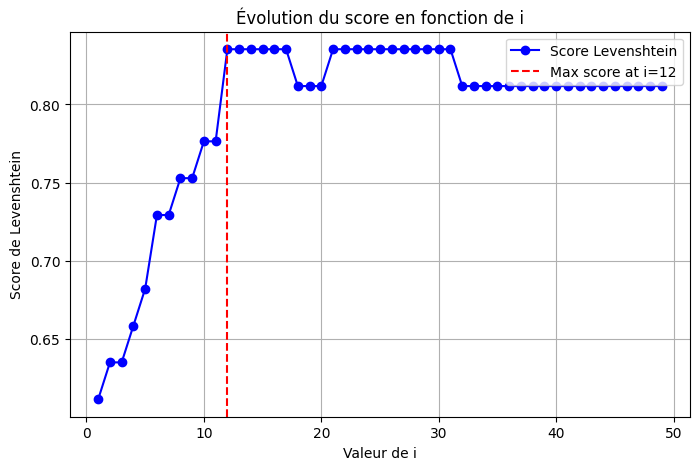

Meilleure valeur de i : 0.04081632653061224 avec un score de 0.8352941176470589


In [29]:
import matplotlib.pyplot as plt

ss0 = alifold_alignment(test_list_of_sequences, 2)

gamma=0.02
#delta = 0.6
scores = []  # Liste pour stocker les scores
i_values = list(range(1, 50))  # Liste des valeurs de i testées

i_max = 0
score_max = 0

for i in i_values:
    ss1 = MEA_stacking(test_list_of_sequences, gamma, 2/i, m=2)
    score = levenshtein_distance(ss0, ss1)
    scores.append(score)  # Stocker le score

    if score > score_max:
        score_max = score
        i_max = i

# 📊 Affichage du graphe
plt.figure(figsize=(8, 5))
plt.plot(i_values, scores, marker='o', linestyle='-', color='b', label="Score Levenshtein")
plt.axvline(i_max, color='r', linestyle='--', label=f"Max score at i={i_max}")
plt.xlabel("Valeur de i")
plt.ylabel("Score de Levenshtein")
plt.title("Évolution du score en fonction de i")
plt.legend()
plt.grid(True)
plt.show()

print(f"Meilleure valeur de i : {2/i} avec un score de {score_max}")
